<a href="https://colab.research.google.com/github/hiren-2911/Number_detection_using_color_segmentation/blob/master/Number_detect(Real_Time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Activation,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from matplotlib import colors 
import numpy as np
import os

In [ ]:
#taking snaps from the video and saving them
#this can be done using open cv
#creating the video object and give path to the video whose snaps are to be taken
cap=cv2.VideoCapture('/content/drive/My Drive/video_9.mp4')
try:
  if not (os.path.exists('/content/drive/My Drive/video_of_9')):
    os.mkdir('/content/drive/My Drive/video_of_9')
except OSError: 
   print ('Error: Creating directory of data') 
countframe=0
while(True):
  success,frame=cap.read()
  if success:
    name='/content/drive/My Drive/video_of_9/'+str(countframe)+'.jpg'
    cv2.imwrite(name,frame)
    countframe=countframe+1
  else:
    break
cap.release()
cv2.destroyAllWindows()


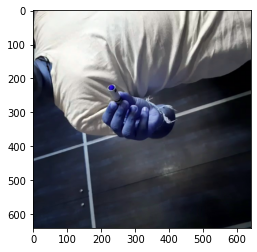

In [2]:
#As we can see we have gathered all the snaps from the video
#we can see the snap using the cv2 or matplotlib imshow function
#here i am using matplotlib.pyplot.imshow
img_preview=cv2.imread('/content/drive/My Drive/video_of_2/0.jpg')
#img_preview=img_preview[:,:,1]
plt.imshow(img_preview)


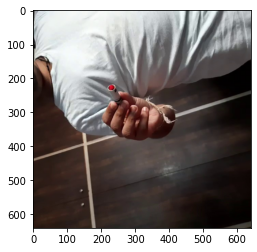

In [3]:
#as we can see we cant view the in original form.
#this is because we read the image using the cv2 library and here the defult color channel is BGR
#we need to convert it into RGB to view is as normal image
RGB_img=cv2.cvtColor(img_preview,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [4]:
#now applying the color segmentation on single image and see if it works:
#this are the color ranges of the color we want to segment
#color codes for 2/3
light=(220-20,0,44-20)
dark=(220+20,13+20,44+20)
#color codes for 6
#light=(198-20,23-20,51-20)
#dark=(198+20,23+20,51+20)
#codes for 9
#light=(191-20, 61-20, 69-20)
#dark=(191+20, 61+20, 69+20)

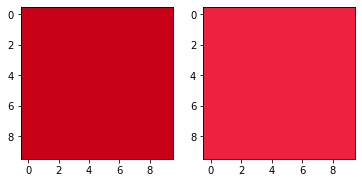

In [5]:
#we can view the colour by plotting it
#to view the color we can do the following thing
light_clr=np.ones((10,10,3),dtype='uint8')*light/255.0
dark_clr=np.ones((10,10,3),dtype='uint8')*dark/255.0
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.imshow(light_clr)
ax2=fig.add_subplot(1,2,2)
ax2.imshow(dark_clr)

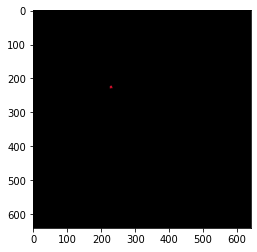

In [6]:
#now as we have extracted the right color from the image we make a mask and perform a bitwise and operation bewteen th e mask and image
#mask can be made using following code
img=cv2.imread('/content/drive/My Drive/video_of_2/0.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask=cv2.inRange(img,light,dark)
masked_img=cv2.bitwise_and(img,img,mask=mask)
plt.imshow(masked_img)

In [7]:
#as we can see we have correctly segmented the color in one image now we can proceed to do that in all images
#we will make a function here that reads the images and converts it to RGB channel
def read(i):
  img=cv2.imread('/content/drive/My Drive/video_of_2/{}.jpg'.format(i))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

In [8]:
#now we will make a function to mask and applying the bitwise and operation
def mask(img):
  mask=cv2.inRange(img,light,dark)
  masked_img=cv2.bitwise_and(img,img,mask=mask)
  return masked_img

In [9]:
#now we will apply the mask to each image.
#but before that we will make a list of all the images so we can easily deal with all images.
files=os.listdir('/content/drive/My Drive/video_of_2')
num_files=len(files)

In [10]:
#now we will write a function to apply mask to all images in one shot
#we also make a empty list and append all the color segmented images to that list
def mask_all():
  color_img=[]*num_files
  for i in range(0,num_files):
    img=read(i)
    masked_img=mask(img)
    color_img.append(masked_img)
  return color_img

In [11]:
#now as we got the list of all the color segmented images we add the pixel values of every image.
#by doing this the black pixels remain as they are and the colored pixels starts to add at different positions in same image
#hence we obtain a image containing many small small dots which form a number.
def one_img(color_img):
  sum_img=sum(color_img)
  sum_img=sum_img.astype('float32')
  return sum_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


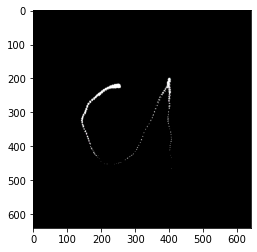

In [12]:
#now as all the functions are ready we are ready to apply the color segmentation
color_img=mask_all()
sum_img=one_img(color_img)
#now we convert the RGB to Grayscale image as our classifier works in grayscale images
gray_img=cv2.cvtColor(sum_img,cv2.COLOR_BGR2GRAY)
plt.imshow(sum_img,cmap='gray')

In [13]:
#as our images were rotated we need to rotate this final image.
#we can do this by cv2 libraries
sum_img=gray_img
def rotate(sum_img):
  flip_img=cv2.flip(sum_img,1)
  rotate_img=cv2.rotate(flip_img,cv2.ROTATE_90_COUNTERCLOCKWISE)
  #plt.imshow(rotate_img)
  return rotate_img

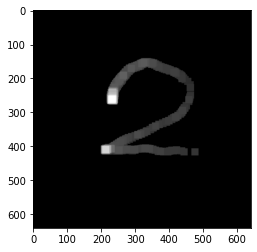

In [16]:
#Thats look like a pretty well detection
#but it is too vage for the classifer to work upon.
#we dilate the image so that 2 is clearly visible
#for dilation we need to make a kerel which can move over the image.
#we do this using numpy
rotate_img=rotate(sum_img)
def dilate(rotate_img):
  kernel=np.ones((2,2),dtype='uint8')
  dlt_img=cv2.dilate(rotate_img,kernel,iterations=20)
  return dlt_img
dlt_img=dilate(rotate_img)
plt.imshow(dlt_img,cmap='gray')

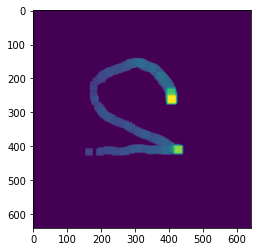

In [15]:
dlt_img=cv2.flip(dlt_img,1)
plt.imshow(dlt_img)

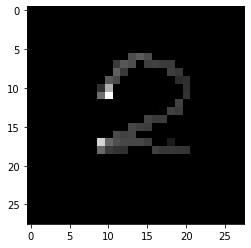

In [17]:
#a pretty well work right!!!
#you can increase or decrease the density of number by increasing pr decreasing the iterations.
#now as the image can be of any size but we need some standard image size which can be feed to the classifier
#to do this we resize the image to a sige of (28x28)
#as for the classifier i have used the famous MNSIT data set.
#this dataset has over grayscale image of digits 0-9 in size (28x28)
#so we resize the image.
#dlt_img=dilate(rotate_img)
def resize(dlt_img):
  resize_img=cv2.resize(dlt_img,(28,28))
  return resize_img
resize_img=resize(dlt_img)
plt.imshow(resize_img,cmap='gray')

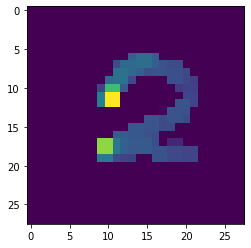

In [18]:
#woahh!
#that just destroyed the whole image.
#no worries now we can slightly dilate the image to smoothen the image and make it ready for the classifier.
resize_img=resize(dlt_img)
def dilate2(resize_img):
  kernel=np.ones((2,2),dtype='uint8')
  dlt2_img=cv2.dilate(resize_img,kernel,iterations=1)
  return dlt2_img
dlt2_img=dilate2(resize_img)
plt.imshow(dlt2_img)

In [ ]:
#pretty good right!
#now lets jump for the classifier!!!
#as we are using the MNSIT data set it is availabe in keras.
#we can directly download it from there.
data=tf.keras.datasets.mnist.load_data()
(x_train,y_train),(x_test,y_test)=data

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#preprocessing the data
#x_train=x_train/255.0
#x_test=x_test/255.0
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

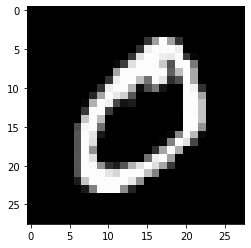

In [ ]:
#to get the glimpse of the data we will see a image from the data.
plt.imshow(x_train[1],cmap='gray')

In [ ]:
#so thats how our data looks like!!
#now that we are ready with the data and we have also seen the data we will jump to build the model for classification.
def model():
    model=Sequential([
                  Conv2D(16,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dropout(0.3),
                  Dense(512,activation='relu'),
                  Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)
    return model,history

In [ ]:
#now we will start to train our model.
model,history=model()

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1798 - accuracy: 0.9437 - val_loss: 0.0618 - val_accuracy: 0.9785
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.0373 - val_accuracy: 0.9881
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0317 - val_accuracy: 0.9903
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0257 - val_accuracy: 0.9920
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0388 - accuracy: 0.9871 - val_loss: 0.0258 - val_accuracy: 0.9910
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0273 - val_ac

In [19]:
#as the model is trained and we have a pretty high validation accuracy we can use it to classify numbers.
#but first things first lets save the model.
model.save('/content/drive/My Drive/digit_model.h5')

NameError: ignored

In [20]:
#loading the saved model
loaded_model=tf.keras.models.load_model('/content/drive/My Drive/digit_model.h5')

In [21]:
#As the image is the in shape (28x28x3)
#we need a image of shape (1,28,28,1) pss to the predictor
#img=cv2.cvtColor(dlt2_img,cv2.COLOR_BGR2GRAY)
img=dlt2_img

In [22]:
final_image=np.expand_dims(img,-1)
final_image=final_image.astype('float32')
pred_img=np.expand_dims(final_image,0)
prediction=loaded_model.predict_classes(pred_img)
print('The number you have shown me is {}'.format(prediction[0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The number you have shown me is 2


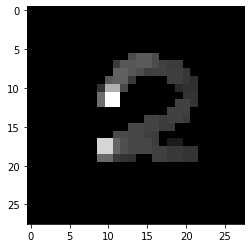

In [23]:
plt.imshow(dlt2_img,cmap='gray')

In [ ]:
extra=cv2.imread('/content/download (1).jpg')
extra.shape

(28, 28, 3)

In [ ]:
extra=np.sum(extra,2)

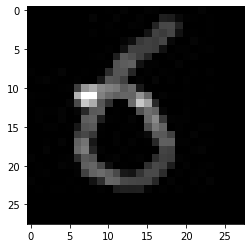

In [ ]:
plt.imshow(extra,cmap='gray')